# Boston

- CRIM     уровень преступности на душу населения по городам
- ZN       доля земли под жилую застройку, зонированная под участки площадью более 25000 кв. футов. 
- INDUS    доля акров, не связанных с розничной торговлей, на город 
- CHAS     Фиктивная переменная реки Чарльз (= 1, если участок ограничивает реку; 0 в противном случае) 
- NOX      концентрация оксидов азота (частей на 10 миллионов)
- RM       среднее количество комнат в доме 
- AGE      доля жилых единиц, построенных до 1940 г.
- DIS      взвешенные расстояния до пяти Бостонских центров занятости 
- RAD      индекс доступности радиальных магистралей 
- TAX      полная ставка налога на имущество за 10 000 долларов США 
- PTRATIO  соотношение учеников и учителей по городам
- B        1000 (Bk - 0,63) ^ 2, где Bk - доля черных по городам. 
- LSTAT    % более низкий статус населения 
- MEDV     Средняя стоимость домов, занимаемых владельцами, в 1000 долларов США 

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# предварительная обработка
from sklearn import preprocessing
from sklearn.preprocessing import Binarizer, KBinsDiscretizer, FunctionTransformer, StandardScaler, RobustScaler
# учебые наборы
from sklearn.datasets import load_iris
# модели
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, log_loss
# импортируем модуль, который помогает случайным образом разбиыть набор данных на тренировочную и тестовую части
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
PATH = 'https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/boston_full.csv'
df = pd.read_csv(PATH, sep='\t')

In [ ]:
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.9,9.08,20.6
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.9,8.26,20.4
82,0.03659,25.0,4.86,0.0,0.426,6.302,32.2,5.4007,4.0,281.0,19.0,396.9,6.72,24.8


## Смотрим данные

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Шкалирование: нормализация и стандартизация

In [ ]:
from sklearn import preprocessing

### Нормализация

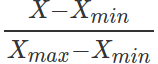

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_feature = min_max_scaler.fit_transform(df['TAX'].values.reshape(-1, 1))
min_max_feature.min(), min_max_feature.max() , min_max_feature.mean() , min_max_feature.std() 

(0.0, 1.0, 0.42220830944694204, 0.32131773862477314)

In [ ]:
min_max_feature[:10]

array([[0.20801527],
       [0.10496183],
       [0.10496183],
       [0.06679389],
       [0.06679389],
       [0.06679389],
       [0.23664122],
       [0.23664122],
       [0.23664122],
       [0.23664122]])

### Стандартизация

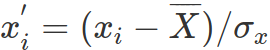

In [ ]:
standart_scaler = preprocessing.StandardScaler()
standart_feature = standart_scaler.fit_transform(df['TAX'].values.reshape(-1, 1))
standart_feature.min(), standart_feature.max() , standart_feature.mean() , standart_feature.std() 

(-1.3139900437927152, 1.7981941894212958, 0.0, 0.9999999999999997)

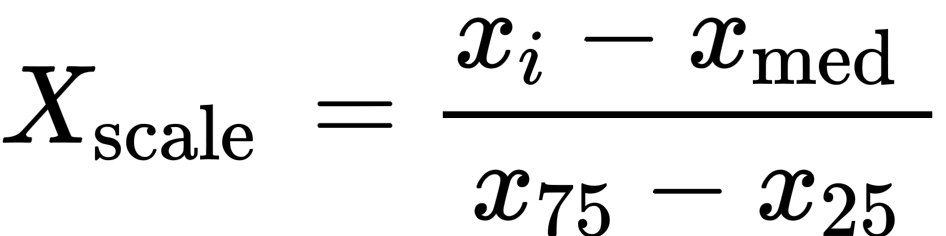

In [ ]:
robust_scaler = preprocessing.RobustScaler()
robust_feature = robust_scaler.fit_transform(df['TAX'].values.reshape(-1, 1))
robust_feature.min(), robust_feature.max() , robust_feature.mean() , robust_feature.std() 

(-0.3695090439276486,
 0.9844961240310077,
 0.2021631890185985,
 0.4350658786547317)

## Работа с выбросами

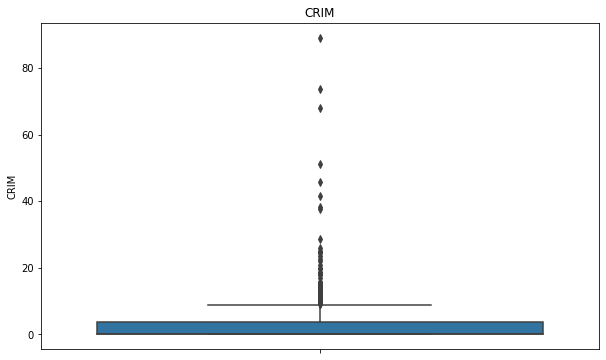

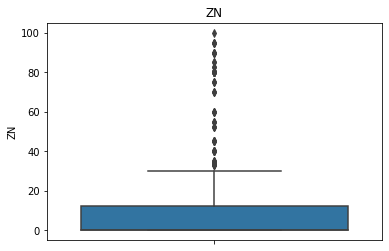

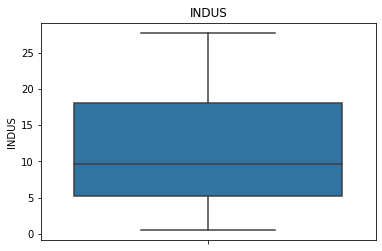

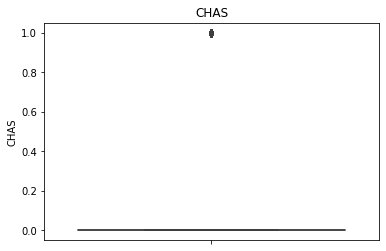

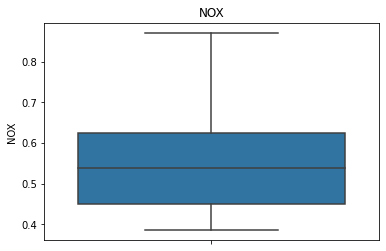

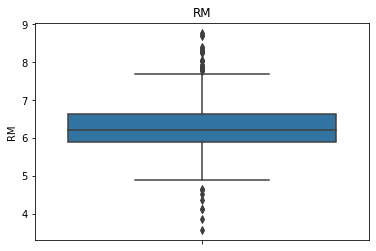

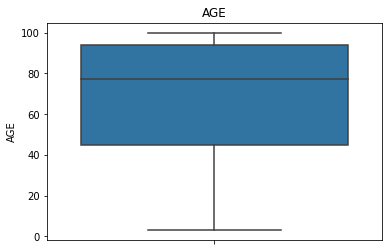

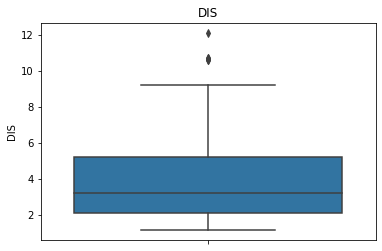

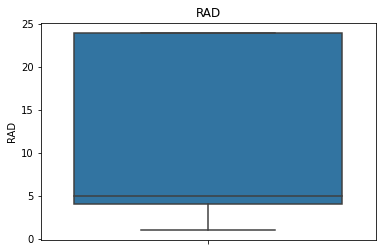

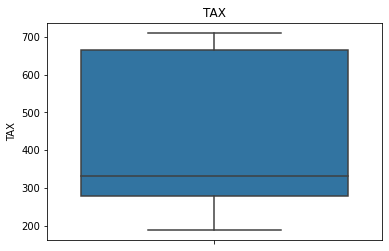

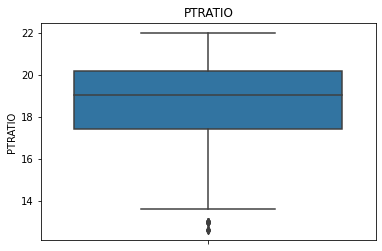

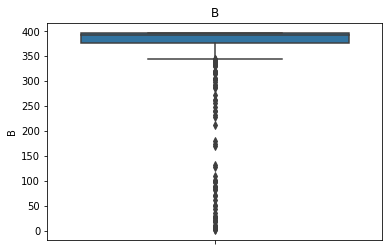

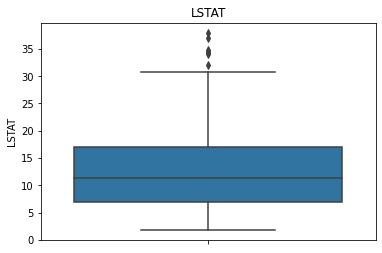

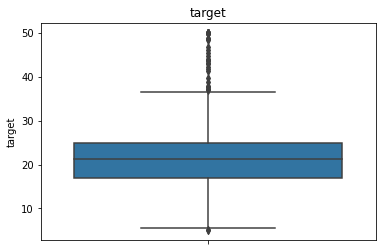

In [ ]:
plt.figure(figsize=(10,6))
for column in df.columns:
    sns.boxplot(y=column, data=df).set_title(column)
    plt.show()

Создадим функцию для поиска выбросов на основе межквартильного размаха

In [ ]:
def search_outliers(feature):
    """Функция принимает набор значений 1-го признака и
    возвращает массив индексов тех значений, которые являются выбросами"""
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((feature < lower_bound) | (feature > upper_bound))[0]

Посмотрим количество выбросов по каждому признаку

In [ ]:
for feature in df.columns:
    sum_outliers = len(search_outliers(df[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {df[feature].shape[0]} наблюдений")
    

Признак CRIM содержит 66 выбросов из 506 наблюдений
Признак ZN содержит 68 выбросов из 506 наблюдений
Признак INDUS содержит 0 выбросов из 506 наблюдений
Признак CHAS содержит 35 выбросов из 506 наблюдений
Признак NOX содержит 0 выбросов из 506 наблюдений
Признак RM содержит 30 выбросов из 506 наблюдений
Признак AGE содержит 0 выбросов из 506 наблюдений
Признак DIS содержит 5 выбросов из 506 наблюдений
Признак RAD содержит 0 выбросов из 506 наблюдений
Признак TAX содержит 0 выбросов из 506 наблюдений
Признак PTRATIO содержит 15 выбросов из 506 наблюдений
Признак B содержит 77 выбросов из 506 наблюдений
Признак LSTAT содержит 7 выбросов из 506 наблюдений
Признак target содержит 40 выбросов из 506 наблюдений


### Стратегии борьбы с выбросами

1. Стратегия сглаживания выбросов. Можно применять логарифм, который частично нивелирует разницу между значениями

In [ ]:
for feature in df.columns:
    sum_outliers = len(search_outliers(np.log1p(df[feature])))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {df[feature].shape[0]} наблюдений")
    

Признак CRIM содержит 6 выбросов из 506 наблюдений
Признак ZN содержит 0 выбросов из 506 наблюдений
Признак INDUS содержит 0 выбросов из 506 наблюдений
Признак CHAS содержит 35 выбросов из 506 наблюдений
Признак NOX содержит 0 выбросов из 506 наблюдений
Признак RM содержит 26 выбросов из 506 наблюдений
Признак AGE содержит 16 выбросов из 506 наблюдений
Признак DIS содержит 0 выбросов из 506 наблюдений
Признак RAD содержит 0 выбросов из 506 наблюдений
Признак TAX содержит 0 выбросов из 506 наблюдений
Признак PTRATIO содержит 16 выбросов из 506 наблюдений
Признак B содержит 78 выбросов из 506 наблюдений
Признак LSTAT содержит 0 выбросов из 506 наблюдений
Признак target содержит 44 выбросов из 506 наблюдений


Можем увидеть, что где-то это работает неплохо, а где-то ухудшает ситуацию

2. Удалить выбросы

При удалении наблюдаем потерю большого числа записей, что при нашем и так небольшом наборе может быть критичным

In [ ]:
d = df.copy()
drop_index = np.array([])
print(d.shape)
for feature in df.columns:
    drop_index = np.hstack((drop_index, search_outliers(df[feature])))
d.drop(drop_index, inplace=True)
print(d.shape)

(506, 14)
(268, 14)


Что мы видим после удаления выбросов? Как это объяснить?

In [ ]:
for feature in d.columns:
    sum_outliers = len(search_outliers(d[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {d[feature].shape[0]} наблюдений")

Признак CRIM содержит 45 выбросов из 268 наблюдений
Признак ZN содержит 49 выбросов из 268 наблюдений
Признак INDUS содержит 0 выбросов из 268 наблюдений
Признак CHAS содержит 0 выбросов из 268 наблюдений
Признак NOX содержит 7 выбросов из 268 наблюдений
Признак RM содержит 7 выбросов из 268 наблюдений
Признак AGE содержит 0 выбросов из 268 наблюдений
Признак DIS содержит 0 выбросов из 268 наблюдений
Признак RAD содержит 35 выбросов из 268 наблюдений
Признак TAX содержит 38 выбросов из 268 наблюдений
Признак PTRATIO содержит 0 выбросов из 268 наблюдений
Признак B содержит 19 выбросов из 268 наблюдений
Признак LSTAT содержит 9 выбросов из 268 наблюдений
Признак target содержит 14 выбросов из 268 наблюдений


Учитываем тот факт, что структура данных после удаления выбросов меняется и используем старые границы для поиска выбросов

In [ ]:
def search_outliers_new(old_feature, new_feature):
    """Функция принимает набор значений 1-го признака каким он был до удаления выбросов,
    чтобы корректно расчитать границы выбросов
    И набор значений того же признака после удаления выбросов
    Возвращает массив индексов тех значений, которые являются выбросами"""
    q1, q3 = np.percentile(old_feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((new_feature < lower_bound) | (new_feature > upper_bound))[0]

In [ ]:
for feature in d.columns:
    sum_outliers = len(search_outliers_new(df[feature], d[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {d[feature].shape[0]} наблюдений")

Признак CRIM содержит 0 выбросов из 268 наблюдений
Признак ZN содержит 0 выбросов из 268 наблюдений
Признак INDUS содержит 0 выбросов из 268 наблюдений
Признак CHAS содержит 0 выбросов из 268 наблюдений
Признак NOX содержит 0 выбросов из 268 наблюдений
Признак RM содержит 0 выбросов из 268 наблюдений
Признак AGE содержит 0 выбросов из 268 наблюдений
Признак DIS содержит 0 выбросов из 268 наблюдений
Признак RAD содержит 0 выбросов из 268 наблюдений
Признак TAX содержит 0 выбросов из 268 наблюдений
Признак PTRATIO содержит 0 выбросов из 268 наблюдений
Признак B содержит 0 выбросов из 268 наблюдений
Признак LSTAT содержит 0 выбросов из 268 наблюдений
Признак target содержит 0 выбросов из 268 наблюдений


3. Создаем новый признак-дубль. Для каждого признака, который содержит выбросы, создадим второй признак, который будет содержать 1, если в базовом признаке есть выброс и 0 иначе

In [ ]:
dd = df.copy()
for feature in dd.columns:
    outliers = search_outliers(df[feature])
    if len(outliers) > 0:
        dd[f"{feature}_out"] = 0
        dd.loc[outliers, f"{feature}_out"] = 1
dd[[column for column in dd.columns if column.endswith('_out')]].sum(axis=0)    

CRIM_out       66
ZN_out         68
CHAS_out       35
RM_out         30
DIS_out         5
PTRATIO_out    15
B_out          77
LSTAT_out       7
target_out     40
dtype: int64

Теперь алгоритм сможет извлечь новую информацию из данных, при этом мы не потеряем ни одной записи

4. Сглаживаем выбросы на основании верхней и нижней границ. Все, что ниже нижней границы - становится равным ей, а все, что больше верхней - становится равным ей

In [ ]:
def outliers_smoothing(feature):
    """Функция принимает набор значений 1-го признака и
    возвращает массив индексов тех значений, которые являются выбросами"""
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    feature = np.where(feature < lower_bound, lower_bound, feature)
    feature = np.where(feature > upper_bound, upper_bound, feature)
    return feature

In [ ]:
dn = df.copy()
for feature in dn.columns:
    dn[feature] = outliers_smoothing(dn[feature])

In [ ]:
for feature in dn.columns:
    sum_outliers = len(search_outliers(dn[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {dn[feature].shape[0]} наблюдений")

Признак CRIM содержит 0 выбросов из 506 наблюдений
Признак ZN содержит 0 выбросов из 506 наблюдений
Признак INDUS содержит 0 выбросов из 506 наблюдений
Признак CHAS содержит 0 выбросов из 506 наблюдений
Признак NOX содержит 0 выбросов из 506 наблюдений
Признак RM содержит 0 выбросов из 506 наблюдений
Признак AGE содержит 0 выбросов из 506 наблюдений
Признак DIS содержит 0 выбросов из 506 наблюдений
Признак RAD содержит 0 выбросов из 506 наблюдений
Признак TAX содержит 0 выбросов из 506 наблюдений
Признак PTRATIO содержит 0 выбросов из 506 наблюдений
Признак B содержит 0 выбросов из 506 наблюдений
Признак LSTAT содержит 0 выбросов из 506 наблюдений
Признак target содержит 0 выбросов из 506 наблюдений


Тут мы также не теряем записи и избавляемся от выбросов, но нужно понимать, что на самом деле мы можем потерять какую-то важную информацию. И в целом, если выбросов много, то может это и не выбросы по факту. Да и когда их мало, то может быть, что они как-то объясняются на основе других признаков.

Например аномально большой расход электроэнергии в здании, может быть потому, что кто-то забыл выключить свет. И тогда это выброс. Но может быть это просто аномально большое здание и расход электроэнергии вполне себе объясним этим фактом. Более того, вместе они доказывают возможность друг друга. И такие "выбросы" терять не стоит точно

## Работа с пропусками в данных

In [ ]:
leave_index = np.random.choice(df.index, 50)
len(leave_index)

50

In [ ]:
d = df.copy()
d.loc[leave_index, ['AGE']] = np.nan

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      457 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 1. Удалить записи с пропусками

In [ ]:
# удаляем строки с пропусками
d.dropna(axis=0).shape

(457, 14)

In [ ]:
# удаляем столбцы с пропусками
d.dropna(axis=1).shape

(506, 13)

In [ ]:
# оставляем строку, если есть хотя бы thresh непустых ячеек
d.dropna(thresh=14).shape

(457, 14)

In [ ]:
# удаляем запись, только если пропуск есть в указанном столбце/столбцах
d.dropna(subset=['NOX']).shape

(506, 14)

### 2. Заполнить пропуски фиксированным значением

#### **Просто 0**

In [ ]:
d['AGE'].fillna(0)[:10]

0     0.0
1    78.9
2    61.1
3    45.8
4    54.2
5    58.7
6    66.6
7    96.1
8     0.0
9    85.9
Name: AGE, dtype: float64

In [ ]:
"""Протестим результат"""
d_fill = d.fillna(0).loc[leave_index, 'AGE']
d_old = df.loc[leave_index, 'AGE']
sum(abs(d_fill - d_old))/d_fill.shape[0]

65.67399999999999

#### **Заполним средним**

In [ ]:
d['AGE'].fillna(d['AGE'].mean())[:10]

0    68.817724
1    78.900000
2    61.100000
3    45.800000
4    54.200000
5    58.700000
6    66.600000
7    96.100000
8    68.817724
9    85.900000
Name: AGE, dtype: float64

In [ ]:
"""Протестим результат"""
d_fill = d.fillna(d['AGE'].mean()).loc[leave_index, 'AGE']
d_old = df.loc[leave_index, 'AGE']
sum(abs(d_fill - d_old))/d_fill.shape[0]

23.04129102844639

#### **Запоним модой**

In [ ]:
age_mode = d['AGE'].mode()[0]
age_mode

100.0

In [ ]:
d['AGE'].fillna(age_mode)[:10]

0    100.0
1     78.9
2     61.1
3     45.8
4     54.2
5     58.7
6     66.6
7     96.1
8    100.0
9     85.9
Name: AGE, dtype: float64

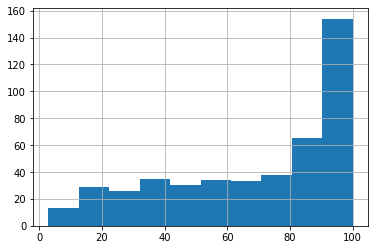

In [ ]:
d['AGE'].hist()

In [ ]:
"""Протестим результат"""
d_fill = d.fillna(age_mode).loc[leave_index, 'AGE']
d_old = df.loc[leave_index, 'AGE']
sum(abs(d_fill - d_old))/d_fill.shape[0]

34.326

#### **Заполним медианой**

In [ ]:
age_median = d['AGE'].median()
age_median

78.3

In [ ]:
d['AGE'].fillna(age_median)[:10]

0    78.3
1    78.9
2    61.1
3    45.8
4    54.2
5    58.7
6    66.6
7    96.1
8    78.3
9    85.9
Name: AGE, dtype: float64

In [ ]:
"""Протестим результат"""
d_fill = d.fillna(age_median).loc[leave_index, 'AGE']
d_old = df.loc[leave_index, 'AGE']
sum(abs(d_fill - d_old))/d_fill.shape[0]

24.06999999999999

### 3. Заполнить предыдущим или последующим значеним

Стоит применять только в случае временных рядов, где ярко выражен тренд

#### **Заполняем предыдущим значением**

In [ ]:
d['AGE'].fillna(method='ffill')[:10]

0     NaN
1    78.9
2    61.1
3    45.8
4    54.2
5    58.7
6    66.6
7    96.1
8    96.1
9    85.9
Name: AGE, dtype: float64

In [ ]:
"""Протестим результат"""
d_fill = d.fillna(method='ffill').loc[leave_index, 'AGE']
d_old = df.loc[leave_index, 'AGE']
sum(abs(d_fill - d_old))/d_fill.shape[0]

nan

#### **Заполняем последующим значением**

In [ ]:
d['AGE'].fillna(method='bfill')[:10]

0    78.9
1    78.9
2    61.1
3    45.8
4    54.2
5    58.7
6    66.6
7    96.1
8    85.9
9    85.9
Name: AGE, dtype: float64

In [ ]:
"""Протестим результат"""
d_fill = d.fillna(method='bfill').loc[leave_index, 'AGE']
d_old = df.loc[leave_index, 'AGE']
sum(abs(d_fill - d_old))/d_fill.shape[0]

12.648000000000001

### 4. Интерполяция

Также подходит лишь для временных рядов

In [ ]:
d['AGE'].interpolate()[:10]

0     NaN
1    78.9
2    61.1
3    45.8
4    54.2
5    58.7
6    66.6
7    96.1
8    91.0
9    85.9
Name: AGE, dtype: float64

In [ ]:
"""Протестим результат"""
d_fill = d.interpolate().loc[leave_index, 'AGE']
d_old = df.loc[leave_index, 'AGE']
sum(abs(d_fill - d_old))/d_fill.shape[0]

nan

### 5. "Интеллектуальный" метод на основе алгоритма машинного обучения

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor(max_depth=5)

In [ ]:
dtr.fit(d.dropna().drop(["AGE", 'target'], axis=1), d['AGE'].dropna())

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
d.loc[d['AGE'].isna(), 'AGE'] = dtr.predict(d.loc[d['AGE'].isna()].drop(["AGE", 'target'], axis=1))

In [ ]:
"""Протестим результат"""
d_fill = d.loc[leave_index, 'AGE']
d_old = df.loc[leave_index, 'AGE']
sum(abs(d_fill - d_old))/d_fill.shape[0]

10.983937938500464

### 6. **В случае заполнения пропусков в дискретных данных (когда есть несколько классов: "низкий", "средний", "высокий" - а не непрерывная величина, вроде температуры) можно использовать те же деревья решений, но как алгоритм классификации**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
data, target = load_iris(return_X_y=True)
iris_df = pd.DataFrame(data)
iris_df['target'] = target
leave_index = np.random.choice(iris_df.index, 30)
len(leave_index)

30

In [ ]:
d = iris_df.copy()
d.loc[leave_index, ['target']] = np.nan

In [ ]:
dtc = DecisionTreeClassifier(max_depth=5)

In [ ]:
dtc.fit(d.dropna().drop(['target'], axis=1), d['target'].dropna())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
d.loc[d['target'].isna(), 'target'] = dtc.predict(d.loc[d['target'].isna()].drop(['target'], axis=1))

In [ ]:
"""Протестим результат"""
d_fill = d.loc[leave_index, 'target']
d_old = iris_df.loc[leave_index, 'target']
sum(d_fill == d_old)/d_fill.shape[0]

1.0

### 7. Для сравнения применим наивный метод заполнения самым частым. По сути он аналогичен методу заполнения модой для числовых признаков

In [ ]:
d = iris_df.copy()
d.loc[leave_index, ['target']] = np.nan

In [ ]:
most_freq = d.target.value_counts().index[0]

In [ ]:
most_freq

2.0

In [ ]:
d.target.fillna(most_freq)[:10]

0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    2.0
7    0.0
8    0.0
9    0.0
Name: target, dtype: float64

In [ ]:
"""Протестим результат"""
d_fill = d.fillna(most_freq).loc[leave_index, 'target']
d_old = iris_df.loc[leave_index, 'target']
sum(d_fill == d_old)/d_fill.shape[0]

0.36666666666666664

## Дискретизация данных

In [ ]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer, FunctionTransformer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html
# https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/preprocessing/_discretization.py

**Бинаризация. Тут все просто. Указываем границу, по которой хотим разбить и разбиваем каждый признак на "меньше гарнфицы" - 0 и "больше границы" - 1**

In [ ]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est = Binarizer(threshold=[1, 4, 12]).fit(X)
est.transform(X)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.]])

**Бинаризация на К частей. Есть три подхода: равномерная разбивка на N часетй (uniform), разбивка по квантилям (quantile) и разбивка на основе К средних**

In [ ]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est = KBinsDiscretizer(n_bins=[4, 3, 3], encode='ordinal', strategy='quantile').fit(X) #uniform  kmeans  quantile
est.transform(X)

array([[0., 1., 2.],
       [2., 2., 1.],
       [3., 0., 0.]])

Можем посмотреть, какие решающие границы получились посе подгонки препроцессора под данные

In [ ]:
est.bin_edges_

array([array([-3. , -1.5,  0. ,  3. ,  6. ]),
       array([3.        , 4.33333333, 5.33333333, 6.        ]),
       array([11.        , 13.        , 14.33333333, 15.        ])],
      dtype=object)

Таким образом находятся квантили по которым бить диапазон, в случае квантильной разбивки

In [ ]:
quantiles = np.linspace(0, 100, 4 + 1)
quantiles

array([  0.,  25.,  50.,  75., 100.])

**Встроенной функции для разбиения на несколько диапазонов нет. Но омжно использовать уже известную нам pd.cut**

**FunctionTransformer позволяет применить к признаку любую функцию**

In [ ]:
bins = [0, 1, 13, 20, 60, np.inf]
labels = ['infant', 'kid', 'teen', 'adult', 'senior citizen']
transformer = FunctionTransformer(
                   pd.cut, kw_args={'bins': bins, 'labels': labels, 'retbins': False}
                  )
X = np.array([0.2, 2, 15, 25, 97])
transformer.fit_transform(X)

['infant', 'kid', 'teen', 'adult', 'senior citizen']
Categories (5, object): ['infant' < 'kid' < 'teen' < 'adult' < 'senior citizen']

**FunctionTransformer можно применять и для других преобразований**

In [ ]:
transformer = FunctionTransformer(np.log1p, validate=True)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

## Категориальные признаки

### Кодирование номанальных категориальных признаков

* номинальные - не порядковые

In [ ]:
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

In [ ]:
feature = np.array([["Texas"],
                    ["California"],
                    ["Texas"],
                    ["Delaware"],
                    ["Texas"]])

In [ ]:
# Создадим кодировщик
one_hot = LabelBinarizer()

In [ ]:
# применим преобразования
ohe_feature = one_hot.fit_transform (feature)
ohe_feature

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
# посмотрим как распределились классы в трансформере
one_hot.classes_

array(['California', 'Delaware', 'Texas'], dtype='<U10')

In [ ]:
# можно применить обратное кодирование
one_hot.inverse_transform(ohe_feature)

array(['Texas', 'California', 'Texas', 'Delaware', 'Texas'], dtype='<U10')

Напомню, что в pandas можно добится похожего эффекта, с помощью get_dummies()

In [ ]:
pd.get_dummies(feature[:, 0])

,California,Delaware,Texas
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


**Но вот если нам нужно закодировать признак, в котором может встречаться одновременно несколько классов?**

In [ ]:
multiclass_feature = [("Texas", "Florida"),
                      ("California", "Alabama"),
                      ("Texas", "Florida"),
                      ("Delware", "Florida"),
                      ("Texas", "Alabama")]

In [ ]:
# создадим мультиклассовый кодировщик
one_hot_multiclass = MultiLabelBinarizer()

In [ ]:
# И вот мы видим, что каждое наблюдение может иметь не одну единицу в одной строке
# а столько сколько было категорий в одном наблюдении
one_hot_multiclass.fit_transform(multiclass_feature)

array([[0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1]])

In [ ]:
# можем посмотреть классы, которые участвовали в обучении кодировщика
one_hot_multiclass.classes_

array(['Alabama', 'California', 'Delware', 'Florida', 'Texas'],
      dtype=object)

In [ ]:
# тут также возможна обратная операция декодирования
one_hot_multiclass.inverse_transform(one_hot_multiclass.fit_transform(multiclass_feature))

[('Florida', 'Texas'),
 ('Alabama', 'California'),
 ('Florida', 'Texas'),
 ('Delware', 'Florida'),
 ('Alabama', 'Texas')]

### Кодирование порядковых категориальных признаков

In [ ]:
df = pd.DataFrame({"оценка": ["низкая", "низкая",
                                      "средняя", "средняя", "высокая"]})
df

,оценка
0,низкая
1,низкая
2,средняя
3,средняя
4,высокая


In [ ]:
# создадим мапинг учитывающий порядок значимости
scale_mapper = {"низкая":1,
                "средняя":2,
                "высокая":3}

In [ ]:
df['оценка'].map(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: оценка, dtype: int64

### Кодирование словарей

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
data_dict = [{"красный": 2, "синий" : 4},
             {"красный": 4, "синий": 3},
             {"красный": 1, "желтый": 2},
             {"красный": 2, "желтый": 2}]

In [ ]:
# создаем трансформер. sparse=False указывает на то, что нужно создать обычную матрицу, не разреженную
dictvectorizer = DictVectorizer(sparse=False)

In [ ]:
# применяем трансформер
features = dictvectorizer.fit_transform(data_dict)

In [ ]:
# результат трансформации
features

array([[0., 2., 4.],
       [0., 4., 3.],
       [2., 1., 0.],
       [2., 2., 0.]])

In [ ]:
# классы, которые запомнил трансформер данных. Их можно применить для создания имен признаков
dictvectorizer.get_feature_names()

['желтый', 'красный', 'синий']

In [ ]:
pd.DataFrame(features, columns=dictvectorizer.get_feature_names())

,желтый,красный,синий
0,0.0,2.0,4.0
1,0.0,4.0,3.0
2,2.0,1.0,0.0
3,2.0,2.0,0.0


## Построим простейшую модель предсказания класса

**Начнем наше знакомство с моделями машинного обучения с задачи классификации**

In [ ]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Давайте сведем задачу регресси, которую предоставляет бостонский набор, к задаче классификации, используя полученные навыки дискретизации данных

In [ ]:
PATH = 'https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/boston_full.csv'
df = pd.read_csv(PATH, sep='\t')
df.sample()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
120,0.06899,0.0,25.65,0.0,0.581,5.87,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0


Сейчас мы наблюдаем, что целевой признак не является дискретным, а значит нет классво, которые можно предсказывать

Давайте применим дискретизацию квантильным методом. Создадим 10 классов

In [ ]:
n_class = 2
quantiles = np.linspace(0, 100, n_class + 1)
quantiles

array([  0.,  50., 100.])

In [ ]:
est = KBinsDiscretizer(n_bins=n_class, encode='ordinal', strategy='quantile').fit(df.target.values.reshape(-1,1)) #uniform  kmeans  quantile
new_target = est.transform(df.target.values.reshape(-1,1))

In [ ]:
est.bin_edges_

array([array([ 5. , 21.2, 50. ])], dtype=object)

Заменим целевой признак

In [ ]:
df['target'] = new_target

Проверим, что получили то, что ожидали

In [ ]:
# Видим, что классы цен распределились почти с идеальным балансом
df.target.value_counts()

1.0    255
0.0    251
Name: target, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.drop('target', axis=1, inplace=True)
df.shape

(506, 13)

Итак, у нас есть набор данных, который подходит для классификации. В котором нет пропусков и не числовых признаков. А значит в таком виде, без каких либо преобразований его уже можно передать алгоритму машинного обучения. Это будет так называемой BaseLine моделью

1. Сначала нужно отделить часть набора данных, который поможет нам тестировать результат. Он так и называется "тестовый набор". А тот, который останется для обучения, соответственно "тренировочный набор"

In [ ]:
# импортируем модуль, который помогает случайным образом разбиыть набор данных на тренировочную и тестовую части
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    df,
                                                    new_target.ravel(),
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=new_target)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [ ]:
# standart_scaler = preprocessing.StandardScaler()
# standart_feature = standart_scaler.fit(X_train)
# X_train_scal = standart_feature.transform(X_train)
# X_test_scal = standart_feature.transform(X_test)

2. Обучим модель

In [ ]:
# создадим простой регрессор
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict = lr.predict(X_test)

3. Нам нужно проверить качество модели. Используем встроенные методы оценки качества

In [ ]:
accuracy_score(y_test, predict)

0.8431372549019608

## Метрики качества моделей

https://docs.google.com/presentation/d/1XRiibc9BVsDYayxWDrnQ7giW9QPFaWjW_2RPNWeEJE0/edit?usp=sharing

**Сделаем немного другую разбивку по целевому признаку**

In [ ]:
PATH = 'https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/boston_full.csv'
df = pd.read_csv(PATH, sep='\t')
est = Binarizer(14).fit(df.target.values.reshape(-1,1))
new_target = est.transform(df.target.values.reshape(-1,1))
df['target'] = new_target
print(df.target.value_counts())
df.drop('target', axis=1, inplace=True)

1.0    429
0.0     77
Name: target, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    df,
                                                    new_target.ravel(),
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=new_target)
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


- TP — это количество верно классифицированных меток положительного класса
- TN — это количество верно классифицированных меток отрицательного класса
- FP — это количество не верно классифицированных меток положительного класса
- FN — это количество не верно классифицированных меток отрицательного класса


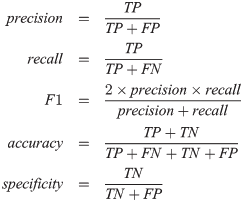

In [ ]:
predict[:3]

array([1., 1., 1.])

In [ ]:
accuracy_score(y_test, predict)

0.9313725490196079

In [ ]:
precision_score(y_test, predict)

0.9438202247191011

In [ ]:
recall_score(y_test, predict)

0.9767441860465116

In [ ]:
f1_score(y_test, predict, average='weighted') # micro, macro, weighted, binary

0.9284110885733603

- 'binary' - результат только для класса, указанного как позитивный
- ‘micro’ - вычисляет показатели глобально, подсчитывая общее количество истинно позитивных срабатываний, ложно негативных срабатываний и ложно позитивных срабатываний
- ‘macro’ - вычисляет показатели для каждого класса и находит их невзвешенное среднее. При этом **НЕ** учитывается дисбаланс классов.
- ’weighted’ - вычисляет показатели для каждого класса и находит их невзвешенное среднее. При этом **учитывается** дисбаланс классов.


**Смотрим logloss на предсказанных классах**

In [ ]:
predict[:5]

array([1., 1., 1., 1., 0.])

In [ ]:
log_loss(y_test, predict)

2.37034737991692

**Смотрим logloss на предсказанных ВЕРОЯТНОСТЯХ классов**

In [ ]:
predictproba = lr.predict_proba(X_test)
log_loss(y_test, predictproba)

0.18711331142105503

In [ ]:
predictproba[:3]

array([[3.69712601e-05, 9.99963029e-01],
       [1.22392891e-03, 9.98776071e-01],
       [5.67381721e-02, 9.43261828e-01]])

Можно вывести комплексный отчет. Тут есть метрики отдельно по каждому классу, а затем усредненные метрики:
- macro avg - считает метрики отдельно по каждому классу, а потом просто усредняет
- weighted avg - учитывает "вес" каждого класса (support), таким образом получаем взвешенную оценку. Если какого-то класса мало и он имеет плохой результат, то это не сильно повлияет на данную метрику

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.85      0.69      0.76        16
         1.0       0.94      0.98      0.96        86

    accuracy                           0.93       102
   macro avg       0.89      0.83      0.86       102
weighted avg       0.93      0.93      0.93       102



Теперь мы можем сложить общее представление о том, какие ошибки мы совершали и в каком количестве, для каждого класса

In [ ]:
confusion_matrix(y_test, predict)

array([[11,  5],
       [ 2, 84]])

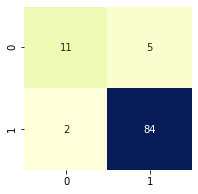

In [ ]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, cmap="YlGnBu", cbar=False);

Используем обертку для создания графиков

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

Получим ответы классификатора не в виде классов, а виде вероятностей классов
- Напомню, что автоматически отнесение к классу происходит на основе сравнения с порогом 0.5

In [ ]:
predicted_probas = lr.predict_proba(X_test)
predicted_probas[:3]

array([[3.69712601e-05, 9.99963029e-01],
       [1.22392891e-03, 9.98776071e-01],
       [5.67381721e-02, 9.43261828e-01]])

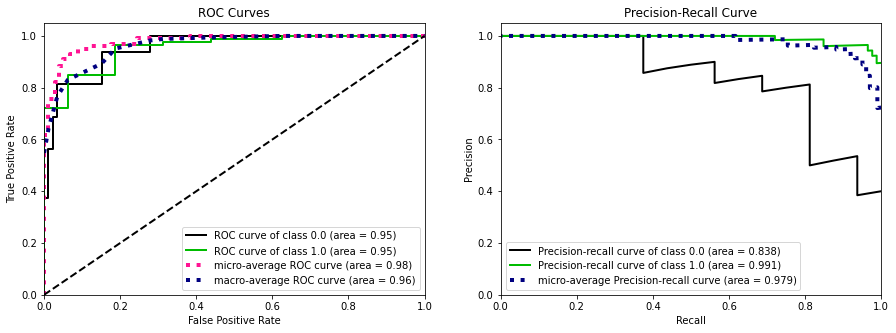

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

skplt.metrics.plot_roc(y_test, predicted_probas, ax=axs[0])
skplt.metrics.plot_precision_recall(y_test, predicted_probas, ax=axs[1])

Метрика ROC_AUC_score - имеет геометрический смысл площади под ROC кривой

In [ ]:
roc_auc_score(y_test, predict, average='weighted')

0.8321220930232558

Давайте немного поиграем с пороговым значением, чтобы лучше понять, что нам говорит график ROC curve

**0.5**

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.85      0.69      0.76        16
         1.0       0.94      0.98      0.96        86

    accuracy                           0.93       102
   macro avg       0.89      0.83      0.86       102
weighted avg       0.93      0.93      0.93       102



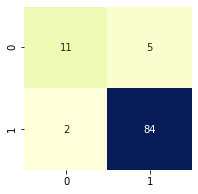

In [ ]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, cmap="YlGnBu", cbar=False);

**0.75**

In [ ]:
 predict_75 = np.array(predicted_probas[:,1] > 0.75, int)
 print(classification_report(y_test, predict_75))

              precision    recall  f1-score   support

         0.0       0.62      0.81      0.70        16
         1.0       0.96      0.91      0.93        86

    accuracy                           0.89       102
   macro avg       0.79      0.86      0.82       102
weighted avg       0.91      0.89      0.90       102



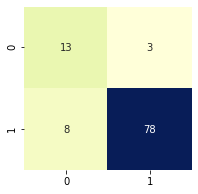

In [ ]:
plt.figure(figsize=(3,3)) 
sns.heatmap(confusion_matrix(y_test, predict_75), annot=True, cmap="YlGnBu", cbar=False);

**0.25**

In [ ]:
 predict_25 = np.array(predicted_probas[:,1] > 0.25, int)
 print(classification_report(y_test, predict_25))

              precision    recall  f1-score   support

         0.0       1.00      0.38      0.55        16
         1.0       0.90      1.00      0.95        86

    accuracy                           0.90       102
   macro avg       0.95      0.69      0.75       102
weighted avg       0.91      0.90      0.88       102



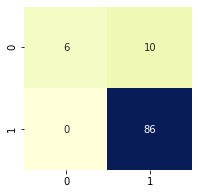

In [ ]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, predict_25), annot=True, cmap="YlGnBu", cbar=False);

Напишем автоматический перебор всех порогов, заточенный под заданную метрику

In [ ]:
predicted_probas = lr.predict_proba(X_test)
biases = np.arange(0,1,0.01)
scores = np.zeros_like(biases)
for i, bias in enumerate(biases):
    predict_bias = np.array(predicted_probas[:,1] > bias, int)
    scores[i] = f1_score(y_test, predict_bias)
arg_max = np.argmax(scores)
print(scores[arg_max], biases[arg_max])

0.9651162790697675 0.56


In [ ]:
scores

array([0.91489362, 0.91489362, 0.9197861 , 0.9197861 , 0.9197861 ,
       0.9197861 , 0.9197861 , 0.92473118, 0.92972973, 0.93478261,
       0.93478261, 0.93478261, 0.93478261, 0.93478261, 0.93478261,
       0.93478261, 0.93478261, 0.93478261, 0.93478261, 0.93478261,
       0.93478261, 0.93478261, 0.93478261, 0.93478261, 0.93478261,
       0.94505495, 0.93922652, 0.93922652, 0.93922652, 0.93922652,
       0.93922652, 0.93922652, 0.93922652, 0.94444444, 0.94444444,
       0.94444444, 0.94444444, 0.94972067, 0.95505618, 0.95454545,
       0.95454545, 0.95454545, 0.95454545, 0.95454545, 0.95454545,
       0.95454545, 0.95454545, 0.95454545, 0.95454545, 0.95454545,
       0.96      , 0.95402299, 0.95402299, 0.95402299, 0.95402299,
       0.95953757, 0.96511628, 0.95906433, 0.95906433, 0.95906433,
       0.95906433, 0.95906433, 0.95294118, 0.95294118, 0.95294118,
       0.95294118, 0.95294118, 0.95294118, 0.95294118, 0.94674556,
       0.94674556, 0.94674556, 0.94047619, 0.94047619, 0.93413

## Конвейер и перекрестная проверка

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [ ]:
PATH = 'https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/boston_full.csv'
df = pd.read_csv(PATH, sep='\t')
est = Binarizer(14).fit(df.target.values.reshape(-1,1))
new_target = est.transform(df.target.values.reshape(-1,1))
df['target'] = new_target
print(df.target.value_counts())
df.drop('target', axis=1, inplace=True)

1.0    429
0.0     77
Name: target, dtype: int64


**Предположим, что мы хотим все же стандартизировать наши данные, перед подачей их алгоритму**

In [ ]:
# Создать стандартизатор
standardizer = RobustScaler()
# Создать классификатор
lr = LogisticRegression()
# Создать конвейер
pipeline = make_pipeline(standardizer, lr)
# Создать k-блочную перекрестную проверку
kf = KFold(n_splits=5, shuffle=True, random_state=42)

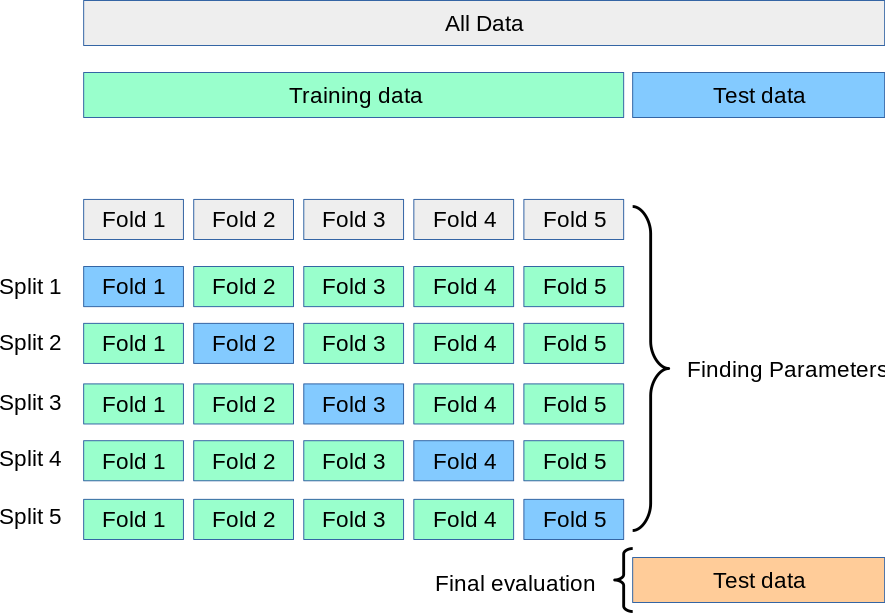

**Делим на train и test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    df,
                                                    new_target.ravel(),
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=new_target)

**Создаем свою функцию потерь**

In [ ]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
ftwo_scorer

make_scorer(fbeta_score, beta=2)

In [ ]:
# Выполнить k-блочную перекрестную проверку
cv_results = cross_val_score(pipeline, # Конвейер
                             X_train, # Матрица признаков
                             y_train, # Вектор целей
                             cv=kf, # Метод перекрестной проверки
                             scoring=ftwo_scorer, # Функция потери
                             n_jobs=-1) # Использовать все ядра CPU

In [ ]:
cv_results

array([0.97183099, 0.97560976, 0.9375    , 0.9672619 , 0.95846645])

In [ ]:
cv_results.mean()

0.962133820089816

In [ ]:
pipeline.fit(X_train, y_train)
predict = pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.85      0.69      0.76        16
         1.0       0.94      0.98      0.96        86

    accuracy                           0.93       102
   macro avg       0.89      0.83      0.86       102
weighted avg       0.93      0.93      0.93       102



## Значимость признаков для модели

In [ ]:
pd.DataFrame({"feature":df.columns, "weight":lr.coef_[0]}).sort_values('weight', ascending=False)

,feature,weight
8,RAD,0.507213
7,DIS,0.428200
2,INDUS,0.402248
3,CHAS,0.218656
1,ZN,0.194935
5,RM,0.060616
11,B,0.047189
0,CRIM,-0.188598
6,AGE,-0.616589
9,TAX,-0.619879


## Подбор гиперпараметров

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import Binarizer
import warnings
warnings.filterwarnings('ignore')

In [65]:
PATH = 'https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/boston_full.csv'
df = pd.read_csv(PATH, sep='\t')
est = Binarizer(threshold=21).fit(df.target.values.reshape(-1,1))
new_target = est.transform(df.target.values.reshape(-1,1))
df['target'] = new_target
print(df.target.value_counts())
df.drop('target', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(
                                                    df,
                                                    new_target.ravel(),
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=new_target)

1.0    257
0.0    249
Name: target, dtype: int64


### GridSearch

In [68]:
%%time
# Создать диапазон вариантов значений штрафного гиперпараметра
penalty_1 = ['l1', 'l2', 'elasticnet']
# Создать диапазон вариантов значений регуляризационного гиперпараметра
Ce = np.logspace(0, 4, 10)
# Создать диапазон вариантов для учета сбалансированности
class_weight = [None, 'balanced']
# Создать диапазон вариантов для решателя
solver = ['liblinear', 'lbfgs', 'newton-cg']
# Создать словарь вариантов гиперпараметров
hyperparameters = dict(C=Ce, penalty=penalty_1, class_weight=class_weight, solver=solver)
# Создать модель классификации
lr = LogisticRegression(random_state=42)
# Создать объект решеточного поиска
gridsearch = GridSearchCV(lr, hyperparameters, cv=5, verbose=1)
# Выполнить подгонку объекта решеточного поиска
best_model = gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
CPU times: user 20 s, sys: 233 ms, total: 20.2 s
Wall time: 20.1 s


In [ ]:
best_model.best_estimator_

LogisticRegression(C=166.81005372000593, penalty='l1', random_state=42,
                   solver='liblinear')

In [69]:
best_model.best_score_

0.8761728395061728

In [70]:
prediction = best_model.predict(X_test)

In [71]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83        50
         1.0       0.86      0.81      0.83        52

    accuracy                           0.83       102
   macro avg       0.83      0.83      0.83       102
weighted avg       0.83      0.83      0.83       102



### RandomizedSearch

In [72]:
%%time
# Создать диапазон вариантов значений штрафного гиперпараметра
penalty = ['l1', 'l2', 'elasticnet']
# Создать диапазон вариантов значений регуляризационного гиперпараметра
C = np.logspace(0, 4, 10)
# Создать диапазон вариантов для учета сбалансированности
class_weight = [None, 'balanced']
# Создать диапазон вариантов для решателя
solver = ['liblinear', 'lbfgs', 'newton-cg']
# Создать словарь вариантов гиперпараметров
hyperparameters = dict(C=C, penalty=penalty, class_weight=class_weight, solver=solver)
# Создать модель классификации
lr = LogisticRegression(random_state=42)
# Создать объект решеточного поиска
gridsearch = RandomizedSearchCV(lr, hyperparameters, cv=5, verbose=1, n_iter=100)
# Выполнить подгонку объекта решеточного поиска
best_model = gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 9.84 s, sys: 57.5 ms, total: 9.89 s
Wall time: 10.8 s


In [73]:
best_model.best_estimator_

LogisticRegression(C=166.81005372000593, penalty='l1', random_state=42,
                   solver='liblinear')

In [74]:
best_model.best_score_

0.8761728395061728

In [75]:
prediction = best_model.predict(X_test)

In [76]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83        50
         1.0       0.86      0.81      0.83        52

    accuracy                           0.83       102
   macro avg       0.83      0.83      0.83       102
weighted avg       0.83      0.83      0.83       102



### Построим более сложный GridSerch для подбора не только гиперпараметров одной модели, но и подбора самих моделей

In [77]:
PATH = 'https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/boston_full.csv'
df = pd.read_csv(PATH, sep='\t')
est = Binarizer(threshold=21).fit(df.target.values.reshape(-1,1))
new_target = est.transform(df.target.values.reshape(-1,1))
df['target'] = new_target
print(df.target.value_counts())
df.drop('target', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(
                                                    df,
                                                    new_target.ravel(),
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=new_target)

1.0    257
0.0    249
Name: target, dtype: int64


In [78]:
%%time
# Создать конвейер
pipe = Pipeline([("classifier", DecisionTreeClassifier())])
# Создать словарь вариантов обучающихся алгоритмов и их гиперпараметров
search_space = [{"classifier": [LogisticRegression()],
                 "classifier__penalty": ['11', '12'],
                 "classifier__C": np.logspace(0, 4, 10)},
                {"classifier": [DecisionTreeClassifier()],
                 "classifier__max_depth": [3, 6, 12, 30],
                 "classifier__max_features": [2, 4, 6, None]}]
# Создать объект решеточного поиска
gridsearch = RandomizedSearchCV(pipe, search_space, cv=5, verbose=1, n_iter=100)
# Выполнить подгонку объекта решеточного поиска
best_model = gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
CPU times: user 684 ms, sys: 2.72 ms, total: 687 ms
Wall time: 684 ms


In [79]:
best_model.best_estimator_

Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(max_depth=3, max_features=6))])

In [80]:
best_model.best_score_

0.8563888888888889

In [81]:
prediction = best_model.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84        50
         1.0       0.95      0.69      0.80        52

    accuracy                           0.82       102
   macro avg       0.85      0.83      0.82       102
weighted avg       0.85      0.82      0.82       102



**Pipline с Gridsearch**

In [83]:
pipe = Pipeline([("normalize", None), ("classifier", DecisionTreeClassifier())])
# Создать словарь вариантов обучающихся алгоритмов и их гиперпараметров
search_space = [{"normalize": [None, StandardScaler(), RobustScaler()],
                 "classifier": [LogisticRegression()],
                 "classifier__penalty": ['11', '12'],
                 "classifier__C": np.logspace(0, 4, 10)},
                {"normalize": [None, StandardScaler(), RobustScaler()],
                 "classifier": [DecisionTreeClassifier()],
                 "classifier__max_depth": [3, 6, 12, 30],
                 "classifier__max_features": [2, 4, 6, None]}]
# Создать объект решеточного поиска
gridsearch = RandomizedSearchCV(pipe, search_space, cv=5, verbose=1, n_iter=100)
# Выполнить подгонку объекта решеточного поиска
best_model = gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [84]:
best_model.best_params_

{'classifier': DecisionTreeClassifier(max_depth=12, max_features=6),
 'classifier__max_depth': 12,
 'classifier__max_features': 6,
 'normalize': None}

In [85]:
best_model.best_score_

0.8466049382716051

In [88]:
import pickle
pickle.dump(best_model, open("my_pipline.pkl", "wb"))

In [90]:
clf = pickle.load(open("my_pipline.pkl", "rb"))

In [91]:
prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79        50
         1.0       0.81      0.75      0.78        52

    accuracy                           0.78       102
   macro avg       0.79      0.78      0.78       102
weighted avg       0.79      0.78      0.78       102



**Создаем свои преобразователи**

In [92]:
from sklearn.base import BaseEstimator

class Estimator(BaseEstimator):

    def fit(self, X, y=None):
        """
        Accept input data, X, and optional target data, y. Returns self.
        """
        return self

    def predict(self, X):
        """
        Accept input data, X and return a vector of predictions for each row.
        """
        return yhat

In [93]:
from sklearn.base import TransformerMixin

class Transfomer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        """
        Learn how to transform data based on input data, X.
        """
        return self

    def transform(self, X):
        """
        Transform X into a new dataset, Xprime and return it.
        """
        return Xprime

In [94]:
nan_col = X_train.sample(3, axis=1).columns
nan_row = X_train.sample(25, axis=0).index
X_train.loc[nan_row, nan_col] = np.nan

In [96]:
class FillNa(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.placeholder = []

    def fit(self, X, y=None):
        for column in X.columns:
            self.placeholder.append(X[column].median())
        return self

    def transform(self, X):
        Xnew = X.copy()
        for placeholder, column in zip(self.placeholder, Xnew.columns):
            Xnew[column] = Xnew[column].fillna(placeholder)
        return Xnew

In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 176 to 459
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      379 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      379 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    379 non-null    float64
dtypes: float64(13)
memory usage: 64.2 KB


In [98]:
fn = FillNa()
Xnew = FillNa().fit_transform(X_train)
Xnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 176 to 459
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 64.2 KB
